# coil scan analysis

In [2]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import PIL # for reading tif images

def get_max_idx(data):
    """return max value and corresponding index for 1d data"""
    maxdat = 0
    maxidx = 0
    for i,dat in enumerate(data):
        if dat > maxdat:
            maxdat = dat
            maxidx = i
    return maxdat, maxidx

expdir = "C:\\Networking Experiment\\artiq codes\\artiq-master"

## Tiff analysis

### Todo. For now, see C:\Users\QC\OneDrive - UW-Madison\Documents\Mathematica\tif_analysis

For analyzing the spooled images we take during the coil scans to verify the MOT still loads with the default settings, 
as of 2023/05/16.

In [21]:
tif_file = os.path.join(expdir, "results\\2023-05-16\\20\\MOTScanCheck.tif")
im_array = np.array(PIL.Image.open(tif_file))

In [23]:
im_array.shape

(281, 281)

In [24]:
PIL.Image.open?

TypeError: Invalid shape (281,) for image data

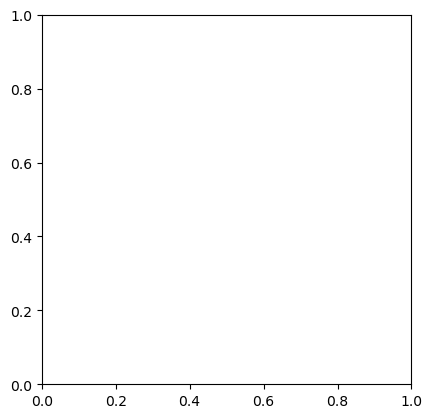

In [10]:
for im in im_data:
    plt.imshow(im)
    plt.show()

## CSV Analysis

In [36]:
# datafile = os.path.join(expdir,"results\\20230506_163411_coil_scan.csv")
# datafile = os.path.join(expdir,"results\\20230516_202753_coil_scan.csv")
# datafile = os.path.join(expdir,"results\\20230517_082908_coil_scan.csv") # very clear SPCM signal
# datafile = os.path.join(expdir,"results\\20230519_114212_coil_scan.csv") # very clear SPCM signal
datafile = os.path.join(expdir,"results\\20230605_114258_coil_scan.csv")


has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]#[:5]
    f.close()

data = np.array(data,float).transpose()
# print(data)
rows,cols = data.shape

In [37]:
counts = data[0]
pd_data = data[-1] # the cooling laser power monitor
coil_data = data[1:-1]#[:12800] # just as a check. should make two figures

zbottom_data, ztop_data, xdata, ydata = coil_data

zbottom_steps = len(list(set(zbottom_data)))
ztop_steps = len(list(set(zbottom_data)))
xsteps = len(list(set(xdata)))
ysteps = len(list(set(ydata)))

In [38]:
### nrows and ncols are the number of subplots in each image
nrows = 2
ncols = 2
assert nrows * ncols == zbottom_steps, f"the number of subplots should be zbottom_steps={zbottom_steps}"

In [39]:
k = l = 0
ysteps*xsteps*zbottom_steps*k + l*ysteps*xsteps
xsteps*ysteps

100

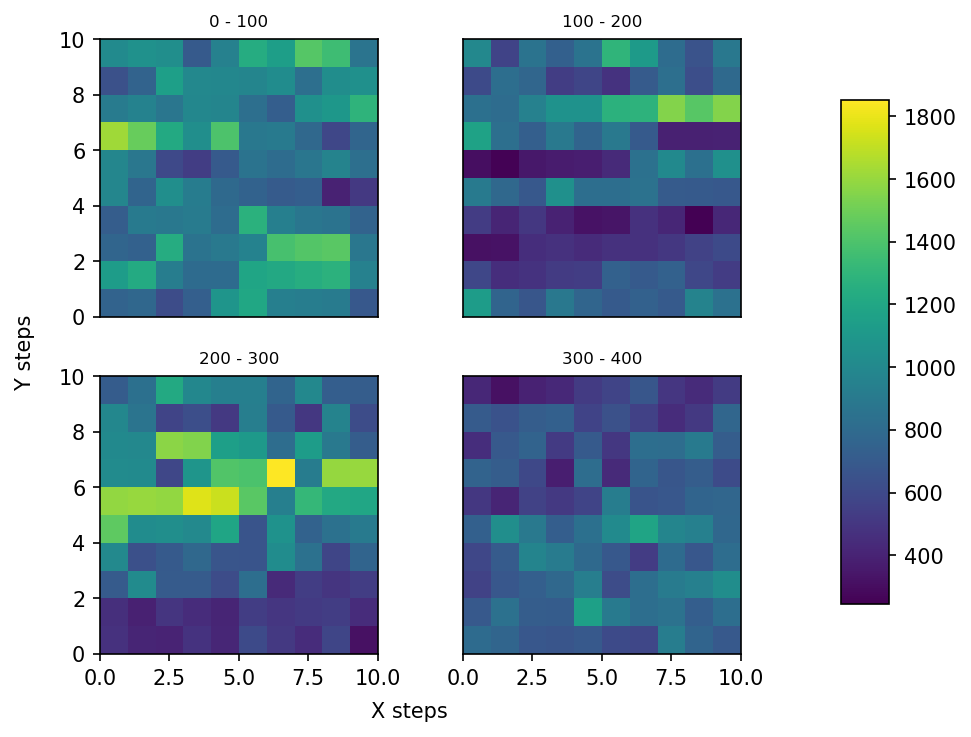

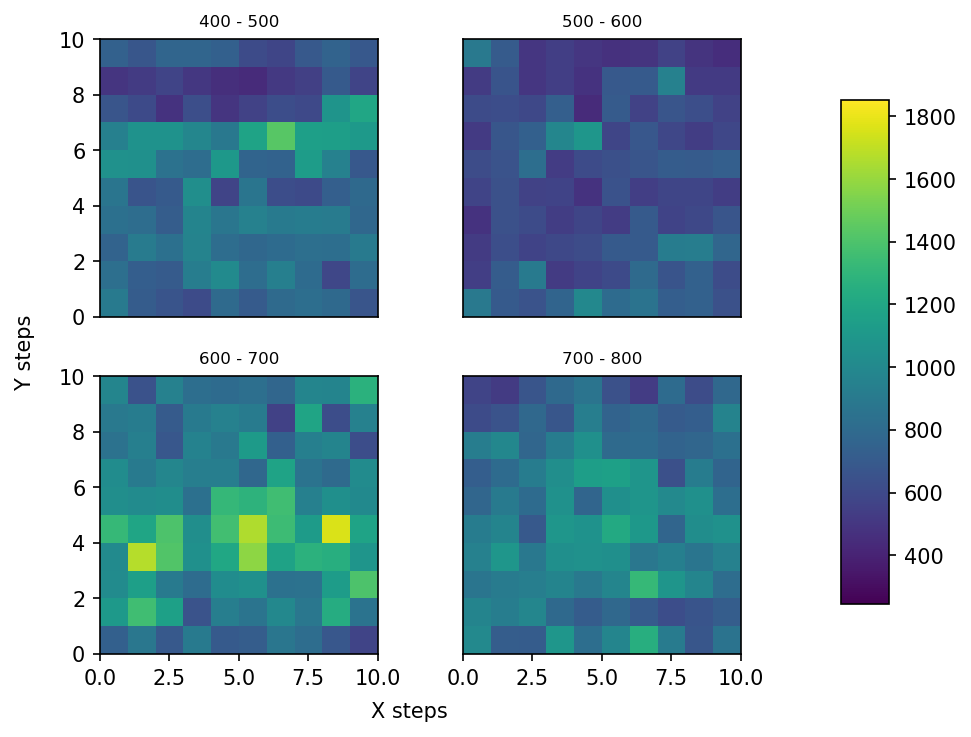

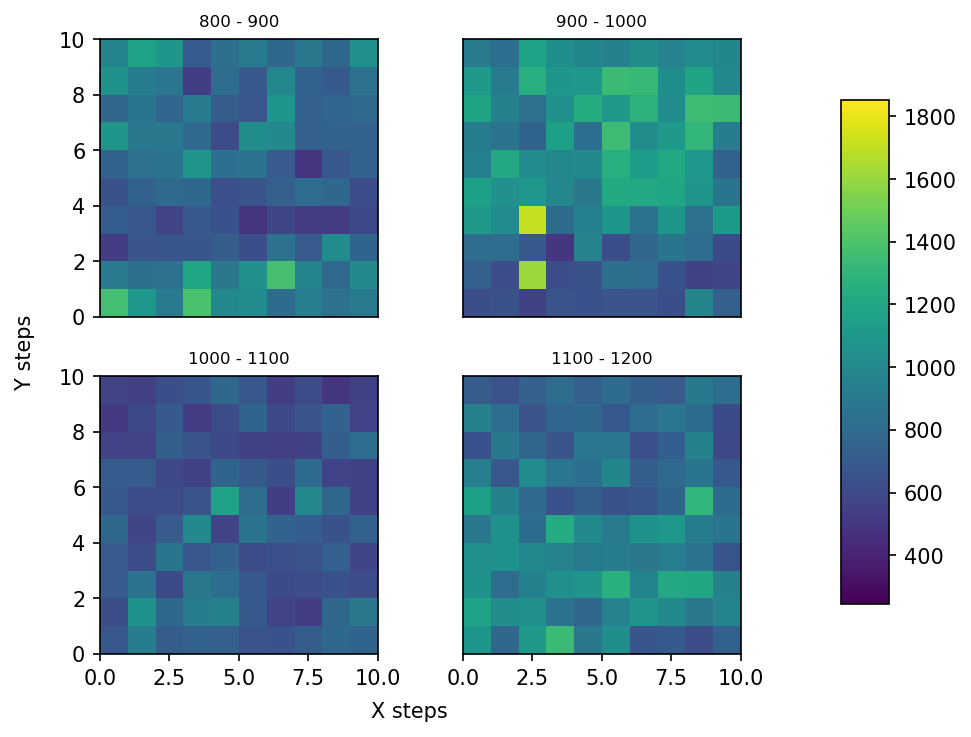

ValueError: cannot reshape array of size 0 into shape (10,10)

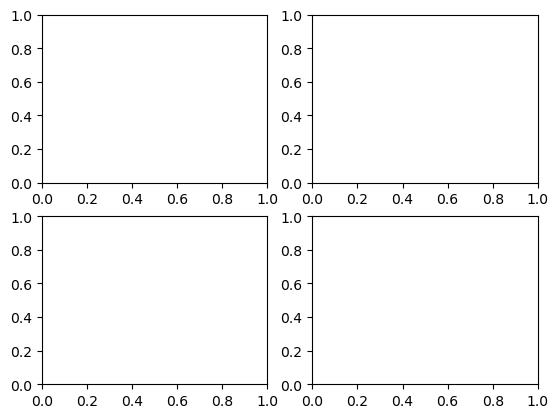

In [40]:
# this plotting procedure assumes that the order of the loops is ztop, zbottom, x, y

ymin = xmin = 0
xmax = ymax = xsteps # assumes ysteps = xsteps

maxcounts = max(counts)
mincounts = min(counts)

for k in range(ztop_steps):
    
    # one figure for each ztop step. each will contain one subplot for each zbottom step
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols)
    
    for l,ax in enumerate(axes.flat):

#         ztop_step = k*ncols + col
#         zbottom_step = l*nrows + row

        # the step where we start counting from to get the counts at x and y steps
        # for the kth ztop step and lth zbottom step
        step0 = ysteps*xsteps*zbottom_steps*k + l*ysteps*xsteps

        imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))

        im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
        ax.set_aspect((ymax-ymin)/(xmax-xmin))
        ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)

#         if col > 0:
#             ax.set_yticks([])
#         if row < 3:
#             ax.set_xticks([])

    # turn off redundant axes ticks
    if nrows > 1:
        [ax.set_xticks([]) for ax in axes[:-1,:].flat]
        [ax.set_yticks([]) for ax in axes[:,1:].flat]
    else:
        pass

    fig.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    fig.text(0.4, 0, 'X steps', ha='center', va='center')
    fig.text(-0.0, 0.5, 'Y steps', ha='center', va='center', rotation='vertical')
    fig.dpi = 150
#         plt.savefig(datafile[:-4] + '_3D_' + str(k*(1+ncols) + l) + '.png', bbox_inches='tight')
#         plt.close()
    plt.show()

#     break

In [29]:
print(ztop_steps)

4


maxidx=236, maxct=1852.0, Vpd=0.0360107421875
coil VZbottom, VZtop, VX, VY = (1.1, -2.8600000000000003, -0.17142857142857146, -0.27)


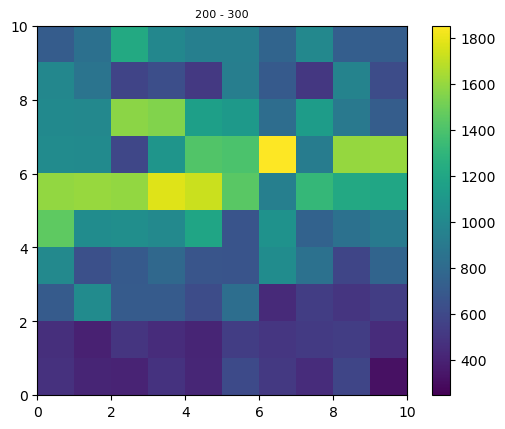

In [35]:
# local max for a given step range
step0 = xsteps*ysteps*(200//(xsteps*ysteps)) #33600 # start here, as motivating by looking at the images we saved

fig,ax = plt.subplots()

imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))
maxct,maxidx = get_max_idx(counts[step0:step0+xsteps*ysteps])
maxidx += step0
print(f"maxidx={maxidx}, maxct={maxct}, Vpd={pd_data[maxidx]}")
print(f"coil VZbottom, VZtop, VX, VY = {zbottom_data[maxidx], ztop_data[maxidx], xdata[maxidx], ydata[maxidx]}")

im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
ax.set_aspect((ymax-ymin)/(xmax-xmin))
ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
fig.colorbar(im)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

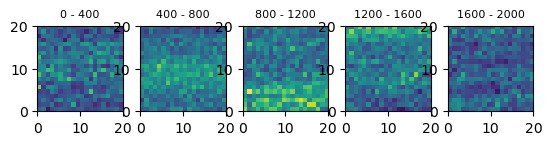

In [12]:
# this plotting procedure assumes that the order of the loops is ztop, zbottom, x, yb

ymin = xmin = 0
xmax = ymax = xsteps # assumes ysteps = xsteps

maxcounts = max(counts)
mincounts = min(counts)

for k in range(ztop_steps):
    
    # one figure for each ztop step. each will contain one subplot for each zbottom step
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols)
    
    for l,ax in enumerate(axes.flat):

#         ztop_step = k*ncols + col
#         zbottom_step = l*nrows + row

        # the step where we start counting from to get the counts at x and y steps
        # for the kth ztop step and lth zbottom step
        step0 = ysteps*xsteps*zbottom_steps*k + l*ysteps*xsteps

        imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))

        im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
        ax.set_aspect((ymax-ymin)/(xmax-xmin))
        ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)

#         if col > 0:
#             ax.set_yticks([])
#         if row < 3:
#             ax.set_xticks([])

    # turn off redundant axes ticks
    [ax.set_xticks([]) for ax in axes[:-1,:].flat]
    [ax.set_yticks([]) for ax in axes[:,1:].flat]

    fig.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

    fig.text(0.4, 0, 'X steps', ha='center', va='center')
    fig.text(-0.0, 0.5, 'Y steps', ha='center', va='center', rotation='vertical')
    fig.dpi = 150
#         plt.savefig(datafile[:-4] + '_3D_' + str(k*(1+ncols) + l) + '.png', bbox_inches='tight')
#         plt.close()
    plt.show()

#     break

In [188]:
# plot the photodiode voltage and counts. produce same number of figures as above

minpd = min(pd_data)
maxpd = max(pd_data)
for i in range(len(counts)//(xsteps*ysteps*ncols*nrows)):
    fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True)
    ax,ax2 = axes
    imin = i*nrows*ncols*xsteps*ysteps
    imax = (i+1)*nrows*ncols*xsteps*ysteps
    ax.plot(counts[imin:imax])
    ax.set_ylim((mincounts,maxcounts))
    ax.set_ylabel("SPCM counts")
    ax2.plot(pd_data[imin:imax])
    ax2.set_ylim((minpd,maxpd))
    ax2.set_ylabel("PD voltage")
    ax.set_title(f"steps i0={imin} to if={imax}")
    ax2.set_xlabel("steps + i0")
    plt.savefig(datafile[:-4] + '_counts_and_pd_' + str(i) + '.png', bbox_inches='tight')
    plt.close()

maxidx=18734, maxct=532.0, Vpd=0.0384521484375
coil VZbottom, VZtop, VX, VY = (0.72, -1.68, -0.61, -0.6225)


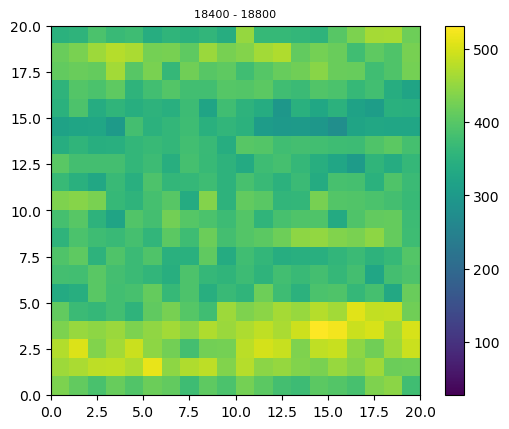

In [219]:
# find the max counts index then print out the coil settings and PD reading

maxct, maxidx = get_max_idx(counts)

print(f"maxidx={maxidx}, maxct={maxct}, Vpd={pd_data[maxidx]}")
print(f"coil VZbottom, VZtop, VX, VY = {zbottom_data[maxidx], ztop_data[maxidx], xdata[maxidx], ydata[maxidx]}")

step0 = xsteps*ysteps*(maxidx//(xsteps*ysteps))

fig,ax = plt.subplots()

imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))

im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
ax.set_aspect((ymax-ymin)/(xmax-xmin))
ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
fig.colorbar(im)

maxidx=41321, maxct=1055.0, Vpd=0.03936767578125
coil VZbottom, VZtop, VX, VY = (0.9199999999999999, -2.76, -0.13500000000000004, -0.021249999999999998)


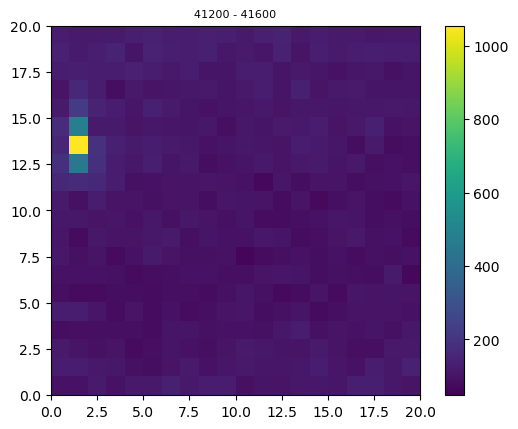

In [43]:
# local max for a given step range
step0 = xsteps*ysteps*(41200//(xsteps*ysteps)) #33600 # start here, as motivating by looking at the images we saved

fig,ax = plt.subplots()

imdata = counts[step0:step0+xsteps*ysteps].reshape((xsteps,ysteps))
maxct,maxidx = get_max_idx(counts[step0:step0+xsteps*ysteps])
maxidx += step0
print(f"maxidx={maxidx}, maxct={maxct}, Vpd={pd_data[maxidx]}")
print(f"coil VZbottom, VZtop, VX, VY = {zbottom_data[maxidx], ztop_data[maxidx], xdata[maxidx], ydata[maxidx]}")

im = ax.imshow(imdata, extent=[ymin, ymax, xmin, xmax], vmin=mincounts, vmax=maxcounts)
ax.set_aspect((ymax-ymin)/(xmax-xmin))
ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
fig.colorbar(im)

In [1]:
20**4

160000

## tests

In [14]:
i=0
j=0
k=0
l=0
row=0
col=2
i*xsteps + j + k*xsteps*ysteps*col + 

0

In [36]:
i=19
j=19
k=19/4
l=19/4
row=4
col=4
i*xsteps + j + k*xsteps*ysteps*col + l*(i*xsteps + j + k*xsteps*ysteps*col)*row

159980.0

In [31]:
20**4

160000

In [124]:
zbottom_steps//nrows

0

In [64]:
ztop_steps//ncols,zbottom_steps//nrows

(5, 5)

In [160]:
for k in range(ztop_steps//ncols):
    for l in range(zbottom_steps//nrows):
        print(k*(1+ncols) + l, k, l)

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 1 0
6 1 1
7 1 2
8 1 3
9 1 4
10 2 0
11 2 1
12 2 2
13 2 3
14 2 4
15 3 0
16 3 1
17 3 2
18 3 3
19 3 4
20 4 0
21 4 1
22 4 2
23 4 3
24 4 4


In [ ]:
for k in range(ztop_steps//ncols):
    for col in range(ncols):
        print(k*ncols+col)

In [193]:
k = l = 4
col = row = 3
ztop_step = k*ncols + col
zbottom_step = l*nrows + row

# the step where we start counting from to get the counts at x and y steps
# for a given ztop,zbottom
step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
print(step0+20**2, 20**4)

160000 160000


In [14]:
i=0
j=0
k=0
l=0
row=0
col=2
i*xsteps + j + k*xsteps*ysteps*col + 

0

In [36]:
i=19
j=19
k=19/4
l=19/4
row=4
col=4
i*xsteps + j + k*xsteps*ysteps*col + l*(i*xsteps + j + k*xsteps*ysteps*col)*row

159980.0

In [31]:
20**4

160000

In [124]:
zbottom_steps//nrows

0

In [64]:
ztop_steps//ncols,zbottom_steps//nrows

(5, 5)

In [72]:
for k in range(ztop_steps//ncols):
    for col in range(ncols):
        print(k*ncols+col)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [83]:
k = l = 4
col = row = 3
ztop_step = k*ncols + col
zbottom_step = l*nrows + row

# the step where we start counting from to get the counts at x and y steps
# for a given ztop,zbottom
step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
print(step0+20**2, 20**4)

159600 160000


In [129]:
k = 0
l = 0
col = 0
row = 0
ztop_step = k*ncols + col
zbottom_step = l*nrows + row

# the step where we start counting from to get the counts at x and y steps
# for a given ztop,zbottom
step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
print(step0)

0


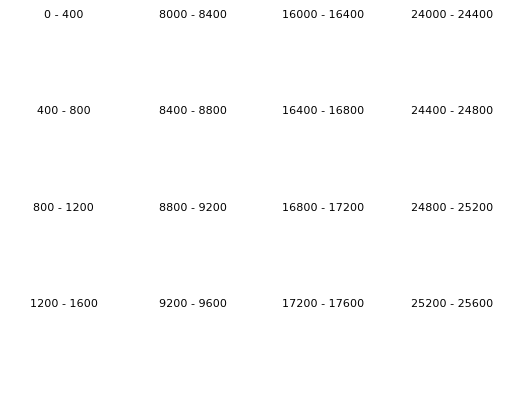

In [204]:
k = 0
l = 0
fig, axes = plt.subplots(nrows=nrows,ncols=ncols)
for row in range(nrows):
    for col in range(ncols):
        ax = axes[row,col]
        ztop_step = k*ncols + col
        zbottom_step = l*nrows + row

        # the step where we start counting from to get the counts at x and y steps
        # for a given ztop,zbottom
        step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
        ax.plot([],[])
        ax.set_axis_off()
        ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
# print(step0)

In [205]:
steps = []
for k in range(ztop_steps//ncols):
    for l in range(zbottom_steps//nrows):
        for row in range(nrows):
            for col in range(ncols):
#                 ax = axes[row,col]
                ztop_step = k*ncols + col
                zbottom_step = l*nrows + row

                # the step where we start counting from to get the counts at x and y steps
                # for a given ztop,zbottom
                step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
                steps.append(step0)
#                 ax.plot([],[])
#                 ax.set_axis_off()
#                 ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
        # print(step0)
steps = sorted(steps)

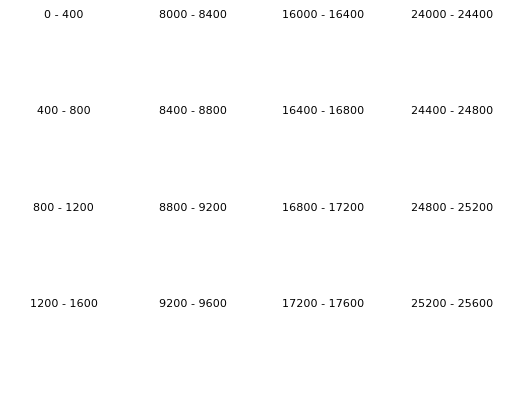

In [204]:
f
fig, axes = plt.subplots(nrows=nrows,ncols=ncols)
for row in range(nrows):
    for col in range(ncols):
        ax = axes[row,col]
        ztop_step = k*ncols + col
        zbottom_step = l*nrows + row

        # the step where we start counting from to get the counts at x and y steps
        # for a given ztop,zbottom
        step0 = ysteps*xsteps*zbottom_steps*ztop_step + zbottom_step*ysteps*xsteps
        ax.plot([],[])
        ax.set_axis_off()
        ax.set_title(f"{step0} - {step0+xsteps*ysteps}",fontsize=8)
# print(step0)

Text(0, 0.5, 'y')

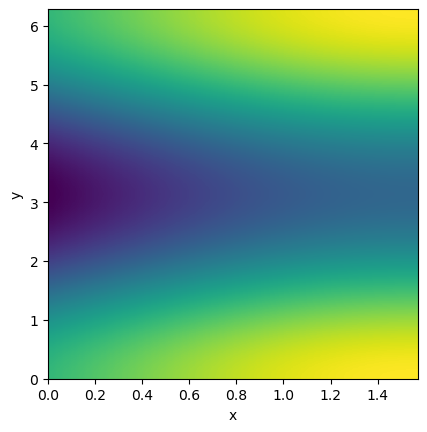

In [98]:
nx = 200
ny = 50
xpts = np.linspace(0,2*np.pi,nx)
ypts = np.linspace(0,np.pi/2,ny)
data = np.zeros(nx*ny)
step = 0
for x in xpts:
    for y in ypts:
        data[step] = np.cos(x)+np.sin(y)
        step += 1
fig,ax = plt.subplots()
ax.imshow(data.reshape((nx,ny)),extent=[ypts[0],ypts[-1],xpts[0],xpts[-1]])
ax.set_aspect((ypts[-1]-ypts[0])/(xpts[-1]-xpts[0]))
ax.set_xlabel("x")
ax.set_ylabel("y")